
# Kowshik P 

## ML Clustering assignment submitted on 02-May-2022
## -----------------------------------------------------------------------------
## Model Implemented - Mini-Batch - KMeans and Random Forest
## Metric - Confusion Matrix (Accuracy_score)
## Accuracy Rate of Model : 0.99
## Type - 1 error: 1
## Type - 2 error: 0 
## Performance - Good
## -----------------------------------------------------------------------------


In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as mat;


In [2]:
dataset = pd.read_csv("Mall_Customers.csv");

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
independent = dataset.iloc[:, [3, 4]].values;

#independent

In [4]:
from sklearn.cluster import MiniBatchKMeans;

#list1 = [];

for listValues in range(1, 11):
    kmeansMiniBatch = MiniBatchKMeans(n_clusters = listValues, init = 'k-means++', random_state = 42);
    kmeansMiniBatch.fit(independent);
    #list1.append(kmeansMiniBatch.inertia_)
#mat.plot(range(1, 11), list1);
#mat.title("The Elbow Method");
#mat.xlabel("Number of Clusters");
#mat.ylabel("WCSS");
#mat.show;






In [5]:
from sklearn.cluster import MiniBatchKMeans;

miniBatch = MiniBatchKMeans(n_clusters = 5);

y_miniBatch = miniBatch.fit_predict(independent);
 
y_miniBatch

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [6]:
supervised = pd.DataFrame(dataset);

supervised["Cluster_Group"] = y_miniBatch;

supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [7]:
supervised.to_csv("cluster_csv", index = False);

C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


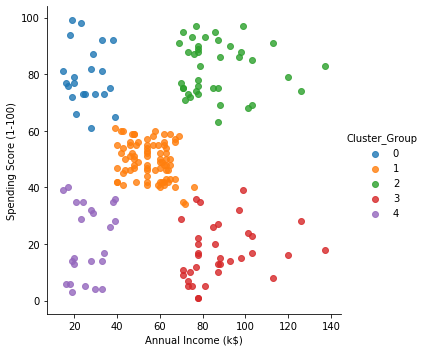

In [8]:
import seaborn as sns;

facet = sns.lmplot(data = supervised, x = supervised.columns[3], y = supervised.columns[4], hue = supervised.columns[5], 
          fit_reg = False, legend = True, legend_out = True);

In [9]:
dependent = supervised.iloc[:,[5]].values;

In [10]:
from sklearn.model_selection import train_test_split;

x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 9);

In [11]:
from sklearn.preprocessing import StandardScaler;

standardization = StandardScaler();

x_train = standardization.fit_transform(x_train);

x_test = standardization.transform(x_test);


In [12]:
from sklearn.ensemble import RandomForestClassifier;

randomForestClassifier = RandomForestClassifier();

randomForestClassifier.fit(x_train, y_train);


C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [13]:
y_pred = randomForestClassifier.predict(x_test);

In [14]:
from sklearn.metrics import confusion_matrix;

randamForestConfusionMatrix = confusion_matrix(y_test, y_pred);

print(randamForestConfusionMatrix);


[[11  1  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0  8]]


In [15]:
from sklearn.metrics import classification_report;

randamForestClassifierReport = classification_report(y_test, y_pred);

print(randamForestClassifierReport);

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         8

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.98        67



# Metric(Accuracy Score)
## The best performance is 1

In [16]:
from sklearn.metrics import accuracy_score;

RandomForestClassifierAccuracy = accuracy_score(y_test, y_pred);

print(RandomForestClassifierAccuracy)

0.9850746268656716
